# Techniques to handle imbalanced data

1. Oversampling using SMOTE, RandomOverSampler, ADASYN etc.
2. Undersampling using NearMiss, RandomUnderSampler, ENN, TomekLinks etc.
3. Combination of Over- and undersampling using SMOTETomek, SMOTEENN
3. Tuning XGBoost with scale_pos_weight attribute
4. Tuning RandomForest with class_weight attribute
5. Ensemble Methods : A) EasyEnsembleClassifier, B) Balanced Bagging Classifier, C) Balanced RandomForest Classifier, D) ROSBosstClassifier.
6. Logistic Regression : tuning the threshold
7. Selecting the right performance metrics like auc_score, f1_score, balanced accuracy, confusion matrix etc.

**Note:**<br>
* Usually tuning these ensembling techniques does not improve model performance at all.
* The metric we use in imbalanced data is not accuracy but roc_auc_score, f1_score, balanced accuracy, confusion matrix, recall , precision etc.

**Reference :** <br>
https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/ <br>
https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28 <br>

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

X, y = make_classification(n_samples=3000, weights=[0.82, 0.18], flip_y=0, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

* These functions are needed to run the code.

In [12]:
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

def tuning_single_hyperparameter(model, path, X_train, y_train, hyperparameter_name, hyperparameter_space, scoring, 
                                 cv=5, verbose=False, graph=True):
    try:
        print('Entered function tuning_single_hyperparameter.')
        
        parent_path = 'Single_Hyperparameter_Tuning/'
        if os.path.exists(parent_path) == False:
            os.mkdir(parent_path)
        
        
        model_path = parent_path + path 
        if os.path.exists(model_path) == False:
            os.mkdir(model_path)
            

        
        train_scores = []
        validation_scores = []
        

        #max_depth = [3, 5, 7, 9, 11, 13, 15]
        for x in hyperparameter_space:
            dic = {hyperparameter_name : x}
            model.set_params(**dic)
            scores = cross_validate(model, X_train, y_train, scoring=scoring,
                                  cv=cv, return_train_score=True, n_jobs=-1, verbose=verbose)
    
            train_scores.append(np.mean(scores['train_score']))
            validation_scores.append(np.mean(scores['test_score']))
        
        
            
        if graph:
        
            line1, = plt.plot(hyperparameter_space, train_scores, 'b', label='Train AUC')
            line2, = plt.plot(hyperparameter_space, validation_scores, 'r', label='Validation AUC')
            plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
            plt.ylabel(scoring)
            plt.xlabel(hyperparameter_name)
            plt.savefig(model_path + hyperparameter_name + '_graph.jpg')
            plt.show()
        
            print('Function tuning_single_hyperparameter Completed Successfully. Exited this function.')
            return train_scores, validation_scores 
        else:
            print('Function tuning_single_hyperparameter Completed Successfully. Exited this function.')
            return train_scores, validation_scores
        
    except Exception as e:
        print('Error occured in function tuning_single_hyperparameter. Error Message : ' + str(e))

In [13]:
def train_model(model, X_train, y_train):
    try:
        print('Entered the function train_model')
        model.fit(X_train, y_train)
        
        print('Function train_model Completed Successfully! Exited this function.')
        return model
    except Exception as e:
        print('Error occured in function train_model. Error Messaeg : ' + str(e))

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix, classification_report
import os
import shutil
import matplotlib.pyplot as plt

def evaluate_model_classification(model, path, model_name, X, y):
    try:
        print('Entered function evaluate_model_classification.')
        
        pred = model.predict(X)
        score = roc_auc_score(y, pred)  # scoring is chosen based on the problem statement. In this case we use auc score.
            
        parent_path = model_name + '_ConfusionMatrices/'
        if os.path.exists(parent_path) == False:
            os.mkdir(parent_path)
        
            
        model_path = parent_path + path 
        if os.path.exists(model_path):
            shutil.rmtree(model_path, ignore_errors=False, onerror=None)
            os.mkdir(model_path)
        else:
            os.mkdir(model_path)
            
        print(classification_report(y, pred))
        plt.figure(figsize=(15,12))
        plot_confusion_matrix(model, X, y)
        plt.savefig(model_path+'confusion_matrix.jpg')
        
        print('Function evaluate_model_classification Completed Successfully. Exited this function')
        
        return score
    
    except Exception as e:
        print('Error occured in function evaluate_model_classification. Error Message : '+str(e))

In [15]:
from sklearn.model_selection import cross_val_score

def evaluate_model_cross_validation(model, X_train, y_train, scoring, cv=5, verbose=False):
    try:
        print('Entered function evaluate_model_cross_validation.')
        scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, verbose=verbose)
    
        print('Function evaluate_model_cross_validation Completed Successfully.Exited this function.')
        
    except Exception as e:
        print('Error occured in function evaluate_model_cross_validation. Error Message : '+str(e))
    return scores

In [16]:
from sklearn.model_selection import RandomizedSearchCV

def HyperparameterTuning_RandomizedSearchCV(X_train, y_train, model, params, scoring, n_iter=20, cv=5, verbose=False):
    try:
        print('Entered the function HyperparameterTuning_RandomizedSearchCV.')
        
        search = RandomizedSearchCV(model, params, n_iter=n_iter, scoring=scoring, 
                                cv=cv, n_jobs=-1, verbose=verbose, random_state=1)
    
        
        search.fit(X_train, y_train)
        model.set_params(**search.best_params_)
    
        dic = {'tuned_model' : model,
               'best_hyperparameters' : search.best_params_,
               'best_cv_score' : search.best_score_}
        
        print('Function HyperparameterTuning_RandomizedSearchCV Completed Successfully! Exited this function.')
        return dic
    
    except Exception as e:
        print('Error occured in function HyperparameterTuning_RandomizedSearchCV. Error message : ' + str(e))

In [18]:
from sklearn.base import clone
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import os
import shutil

def best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name, defaultModel, params, 
                                         cv_scoring, cv_kfold=5, cv_n_iter=20):
    
    try:
        print('Entered function best_single_model_RandomizedSearchCV. ')        
            
        # create copies of default model object to avoid unwanted changes
        def_model = clone(defaultModel)
        tun_model = clone(defaultModel)
    
        # 1. Default Model   
        # A) Evaluate model using cross validation
        default_model_cv_scores = evaluate_model_cross_validation(def_model, X_train, y_train, scoring=cv_scoring,
                                                                 cv=cv_kfold)
        default_model_cv_mean_score = np.mean(default_model_cv_scores)
        
        # B) Train KNN model with default hyperparameters
        default_model = train_model(def_model, X_train, y_train)
    
        # C) evaluate the model on test set and training set
        print(f'Default {model_name} Model Performance on TEST SET : ')
        Path_DefaultModel_TestData = 'DefaultModel_TestData_ConfusionMatrix/'
        default_model_test_score = evaluate_model_classification(default_model, Path_DefaultModel_TestData, model_name, X_test, y_test)
        
        print(f'Default {model_name} Model Performance on TRAINING SET : ')
        Path_DefaultModel_TrainingData = 'DefaultModel_TrainingData_ConfusionMatrix/'
        default_model_training_score = evaluate_model_classification(default_model, Path_DefaultModel_TrainingData, model_name,
                                                      X_train, y_train)
    
        
        # 2. Tuned Model
        # If we want to use Optuna to tune Hyperparameters we call model_optuna function
        # A) Tune the model
        dic = HyperparameterTuning_RandomizedSearchCV(X_train=X_train, y_train=y_train, model=tun_model, 
                                       params=params, n_iter=cv_n_iter, scoring=cv_scoring, cv=cv_kfold)
        tunedModel = dic['tuned_model']
        best_params = dic['best_hyperparameters']
        tuned_model_cv_mean_score = dic['best_cv_score']
        
        # B) Calculate the cross validation scores and mean on training set
        tuned_model_cv_scores = evaluate_model_cross_validation(tunedModel, X_train, y_train, scoring=cv_scoring,
                                                                cv=cv_kfold)
        
        # B) Train the tuned model on training set
        tuned_model = train_model(tunedModel, X_train, y_train)
        
        # C) Evaluate the model on test set and training set
        print(f'Tuned Model {model_name} Performance on TEST SET : ')
        Path_TunedModel_TestData = 'TunedModel_TestData_ConfusionMatrix/'
        tuned_model_test_score = evaluate_model_classification(tuned_model, Path_TunedModel_TestData, model_name, X_test, y_test)
        
        print(f'Tuned Model {model_name} Performance on TRAINING SET : ')
        Path_TunedModel_TrainingData = 'TunedModel_TrainingData_ConfusionMatrix/'
        tuned_model_training_score = evaluate_model_classification(tuned_model, Path_TunedModel_TrainingData,
                                                    model_name, X_train, y_train)
        
        # Find the best model with best score
        if tuned_model_test_score >= default_model_test_score:
            best_model_name = 'Tuned Model'
            best_model_object = tuned_model
            
        else:
            best_model_name = 'Default Model'
            best_model_object = default_model
    
        model_infos = {'Model Name' : model_name,
                       'Default Model Object' : default_model,
                       'Default Model Test Score' : default_model_test_score,
                       'Default Model Training Score' : default_model_training_score,
                       'Default Model CV Mean Score' : default_model_cv_mean_score,
                       'Default Model CV Scores' : default_model_cv_scores,
                       'Tuned Model Object' : tuned_model,
                       'Best Hyperparameters' : best_params,
                       'Tuned Model CV Mean Score' : tuned_model_cv_mean_score,
                       'Tuned Model CV Scores' : tuned_model_cv_scores,
                       'Tuned Model Test Score' : tuned_model_test_score,
                       'Tuned Model Training Score' : tuned_model_training_score,
                       'Final Best Model Name' : best_model_name,
                       'Final Best Test Score' : max(tuned_model_test_score, default_model_test_score),
                       'Final Best Model Object' : best_model_object}
        
        
#         if model_name == 'DecisionTreeClassifier':
#             # Show default DecisionTree
#             plt.figure(figsize=(29,15))
#             tree.plot_tree(default_model, filled=True)
            
#             path = 'DecisionTree/'
#             if os.path.exists(path):
#                 shutil.rmtree(path, ignore_errors=False, onerror=None)
#                 os.mkdir(path)
            
#             # Save the default decision tree figure
#             plt.savefig(path + 'default_decisiontree.jpg')
            
#             # Show Tuned Decision Tree
#             plt.figure(figsize=(20,15))
#             tree.plot_tree(tuned_model, filled=True)
#             # Save tuned decision tree figure
#             plt.savefig(path + 'tuned_decisiontree.jpg')
                
        
        print('Function best_single_model_RandomizedSearchCV Completed Successfully. Exited this function.')
        return model_infos
    
        
    except Exception as e:
        print('Error occured in function best_single_model_RandomizedSearchCV. Error message : ' + str(e))

### 1. Oversampling using SMOTE, RandomOverSampler, ADASYN etc.

 **How it works ?** <br>
Oversampling is a technique that generates synthetic data points from minority class to balance the data. 
For example : SMOTE uses K nearest neighbor algorithm to create synthetic minority class data points.

**Advantages and Disadvantages** <br>
* A advantage of oversampling is that unlike under sampling this method leads to no information loss und usually outperforms under sampling.
* A disadvantage of oversampling is that we can overfit to the training set since it replicates the minority class events.

**Note:**<br>
* We can use oversampling with any kind of ML algorithm.
* SMOTE is not very effective for high dimensional data

In [19]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

Entered function tuning_single_hyperparameter.


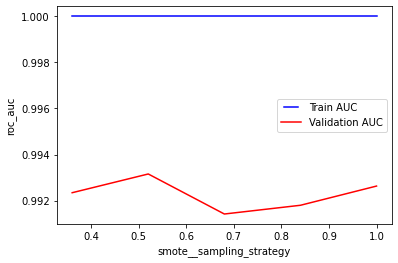

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Sampling Strategy : 0.2 - Train Score : nan , Validation Score : nan
Sampling Strategy : 0.36 - Train Score : 1.0 , Validation Score : 0.9923442119704461
Sampling Strategy : 0.52 - Train Score : 1.0 , Validation Score : 0.9931575564272757
Sampling Strategy : 0.6799999999999999 - Train Score : 1.0 , Validation Score : 0.9914198361727073
Sampling Strategy : 0.8400000000000001 - Train Score : 1.0 , Validation Score : 0.991799009882062
Sampling Strategy : 1.0 - Train Score : 1.0 , Validation Score : 0.9926328707210595


In [20]:
pipeline = Pipeline([('smote' , SMOTE(random_state=1)),
                     ('estimator', XGBClassifier(random_state=1))])

space = np.linspace(0.2, 1, 6)
train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'XGBoost/', X_train, y_train,
                                                        'smote__sampling_strategy', space, 'roc_auc',  5)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Sampling Strategy : {x} - Train Score : {train_score} , Validation Score : {val_score}')

Entered function tuning_single_hyperparameter.


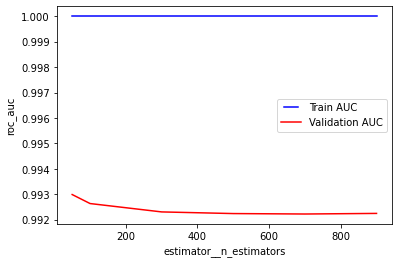

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Nr Estimators : 50 - Train Score : 1.0 , Validation Score : 0.992987179167012
Nr Estimators : 100 - Train Score : 1.0 , Validation Score : 0.9926328707210595
Nr Estimators : 300 - Train Score : 1.0 , Validation Score : 0.992303444197583
Nr Estimators : 500 - Train Score : 1.0 , Validation Score : 0.9922386227948096
Nr Estimators : 700 - Train Score : 1.0 , Validation Score : 0.9922211273154347
Nr Estimators : 900 - Train Score : 1.0 , Validation Score : 0.9922447372788392


In [21]:
pipeline = Pipeline([('smote' , SMOTE(random_state=1)),
                     ('estimator', XGBClassifier(random_state=1))])

space = [50, 100, 300, 500, 700, 900]
train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'XGBoost/', X_train, y_train,
                                                        'estimator__n_estimators', space, 'roc_auc',  5)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Nr Estimators : {x} - Train Score : {train_score} , Validation Score : {val_score}')

Entered function best_single_model_RandomizedSearchCV. 
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
[00:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Function train_model Completed Successfully! Exited this function.
Default XGBoostClassifier Model Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       492
           1       0.90      0.94      0.92       108

    accuracy                           0.97       600
   macro avg       0.95      0.96      0.95       600
weighted avg       0.97      0.97      0.97       600

Function evaluate_model_classification Completed Successfully. Exited this function
Default XGBoostClassifier Model Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1968
           1       1.00      1.00      1.00       432

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.0

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Function HyperparameterTuning_RandomizedSearchCV Completed Successfully! Exited this function.
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
[00:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Function train_model Completed Successfully! Exited this function.
Tuned Model XGBoostClassifier Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       492
           1       0.91      0.92      0.91       108

    accuracy                           0.97       600
   macro avg       0.94      0.95      0.95       600
weighted avg       0.97      0.97      0.97       600

Function evaluate_model_classification Completed Successfully. Exited this function
Tuned Model XGBoostClassifier Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1968
           1       0.99      0.99      0.99       432

    accuracy                           1.00      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       1.00      1.00   

{'Model Name': 'XGBoostClassifier',
 'Default Model Object': Pipeline(steps=[('smote', SMOTE(random_state=1)),
                 ('estimator',
                  XGBClassifier(base_score=0.5, booster='gbtree',
                                colsample_bylevel=1, colsample_bynode=1,
                                colsample_bytree=1, gamma=0, gpu_id=-1,
                                importance_type='gain',
                                interaction_constraints='',
                                learning_rate=0.300000012, max_delta_step=0,
                                max_depth=6, min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=100,
                                n_jobs=8, num_parallel_tree=1, random_state=1,
                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                subsample=1, tree_method='exact',
                                validate_parameters=1, verbosity=None))]),


<Figure size 1080x864 with 0 Axes>

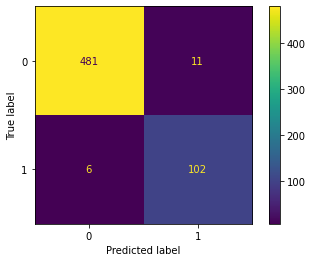

<Figure size 1080x864 with 0 Axes>

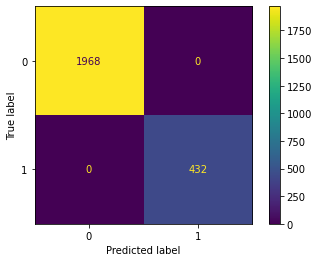

<Figure size 1080x864 with 0 Axes>

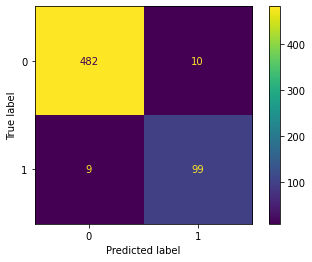

<Figure size 1080x864 with 0 Axes>

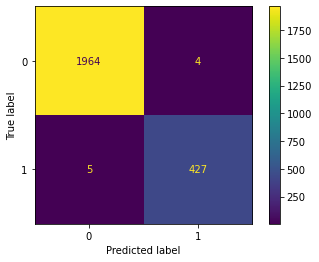

In [23]:
pipeline = Pipeline([('smote' , SMOTE(random_state=1)),
                     ('estimator', XGBClassifier(random_state=1))])

params = {'smote__sampling_strategy' : [0.3, 0.4, 0.6, 0.8, 1],
          'estimator__n_estimators' : [25, 50, 75, 100],
          'estimator__learning_rate' : np.linspace(0.01, 0.2, 6)[:-1][1:],
          'estimator__max_depth' : [2, 5, 7, 10],
          'estimator__subsample' : np.linspace(0, 1, 6)[:-1][1:],
          'estimator__colsample_bytree' : np.linspace(0, 1, 6)[:-1][1:],
          'estimator__min_child_weight' : [1, 5, 10, 15]}

dic = best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name='XGBoostClassifier',
                        defaultModel=pipeline, params=params, cv_scoring='roc_auc', cv_kfold=5, cv_n_iter=30)
dic

### 2. Undersampling using NearMiss, RandomUnderSampler, ENN, TomekLinks etc.

**How it works ?**<br>
Undersampling techniques refer to remove data points from majority class to balance the data. For example RandomUnderSampler randomly selects data points from majority class and removes them.


**Advantages and Disadvantages**<br>
* An advantage of using Undersampling is that it can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.
* A disadvantage of using Undersampling is that It can discard potentially useful information which could be important for building rule classifiers.

In [24]:
from imblearn.under_sampling import NearMiss

Entered function tuning_single_hyperparameter.


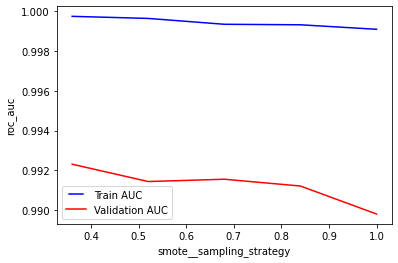

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Sampling Strategy : 0.2 - Train Score : nan , Validation Score : nan
Sampling Strategy : 0.36 - Train Score : 0.9997405072684517 , Validation Score : 0.9923140733767294
Sampling Strategy : 0.52 - Train Score : 0.9996354710099856 , Validation Score : 0.9914448074326991
Sampling Strategy : 0.6799999999999999 - Train Score : 0.9993416971069367 , Validation Score : 0.9915603133315802
Sampling Strategy : 0.8400000000000001 - Train Score : 0.9993156364054492 , Validation Score : 0.9912197178059363
Sampling Strategy : 1.0 - Train Score : 0.9990903426142083 , Validation Score : 0.9898138983356191


In [25]:
pipeline = Pipeline([('smote' , NearMiss()),
                     ('estimator', XGBClassifier(random_state=1))])

space = np.linspace(0.2, 1, 6)
train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'XGBoost/', X_train, y_train,
                                                        'smote__sampling_strategy', space, 'roc_auc',  5)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Sampling Strategy : {x} - Train Score : {train_score} , Validation Score : {val_score}')

Entered function tuning_single_hyperparameter.


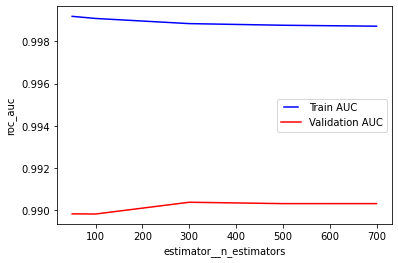

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Nr Estimators : 50 - Train Score : 0.9991909902744908 , Validation Score : 0.9898210197872463
Nr Estimators : 100 - Train Score : 0.9990903426142083 , Validation Score : 0.9898138983356191
Nr Estimators : 300 - Train Score : 0.99884576917423 , Validation Score : 0.9903719320534516
Nr Estimators : 500 - Train Score : 0.9987684291664983 , Validation Score : 0.9903071636489731
Nr Estimators : 700 - Train Score : 0.9987239790888545 , Validation Score : 0.9903075346370354


In [26]:
pipeline = Pipeline([('smote' , NearMiss()),
                     ('estimator', XGBClassifier(random_state=1))])

space = [50, 100, 300, 500, 700]
train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'XGBoost/', X_train, y_train,
                                                        'estimator__n_estimators', space, 'roc_auc',  5)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Nr Estimators : {x} - Train Score : {train_score} , Validation Score : {val_score}')

Entered function best_single_model_RandomizedSearchCV. 
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
[00:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Function train_model Completed Successfully! Exited this function.
Default XGBoostClassifier Model Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       492
           1       0.88      0.90      0.89       108

    accuracy                           0.96       600
   macro avg       0.93      0.94      0.93       600
weighted avg       

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1968
           1       0.96      1.00      0.98       432

    accuracy                           0.99      2400
   macro avg       0.98      1.00      0.99      2400
weighted avg       0.99      0.99      0.99      2400

Function evaluate_model_classification Completed Successfully. Exited this function
Entered the function HyperparameterTuning_RandomizedSearchCV.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Function HyperparameterTuning_RandomizedSearchCV Completed Successfully! Exited this function.
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
[00:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Function train_model Completed Successfully! Exited this function.

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Tuned Model XGBoostClassifier Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       492
           1       0.91      0.91      0.91       108

    accuracy                           0.97       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.97      0.97      0.97       600

Function evaluate_model_classification Completed Successfully. Exited this function
Tuned Model XGBoostClassifier Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1968
           1       0.99      0.98      0.99       432

    accuracy                           0.99      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.99      0.99      0.99      2400

Function evaluate_model_classification Complete

{'Model Name': 'XGBoostClassifier',
 'Default Model Object': Pipeline(steps=[('nearmiss', NearMiss()),
                 ('estimator',
                  XGBClassifier(base_score=0.5, booster='gbtree',
                                colsample_bylevel=1, colsample_bynode=1,
                                colsample_bytree=1, gamma=0, gpu_id=-1,
                                importance_type='gain',
                                interaction_constraints='',
                                learning_rate=0.300000012, max_delta_step=0,
                                max_depth=6, min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=100,
                                n_jobs=8, num_parallel_tree=1, random_state=1,
                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                subsample=1, tree_method='exact',
                                validate_parameters=1, verbosity=None))]),
 'Defaul

<Figure size 1080x864 with 0 Axes>

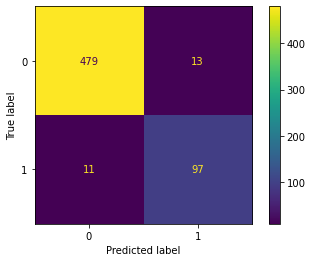

<Figure size 1080x864 with 0 Axes>

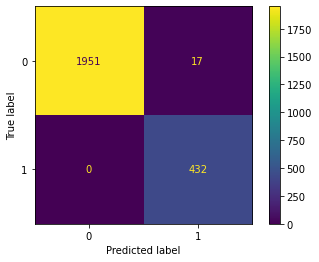

<Figure size 1080x864 with 0 Axes>

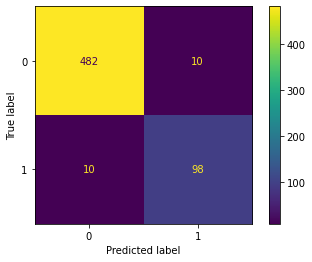

<Figure size 1080x864 with 0 Axes>

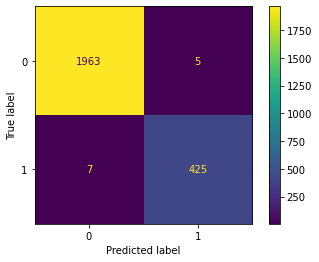

In [27]:
from imblearn.under_sampling import NearMiss
pipeline = Pipeline([('nearmiss' , NearMiss()),
                     ('estimator', XGBClassifier(random_state=1))])

params = {'nearmiss__sampling_strategy' : [0.3, 0.4, 0.6, 0.8, 1],
          'estimator__n_estimators' : [25, 50, 75, 100],
          'estimator__learning_rate' : np.linspace(0.01, 0.2, 6)[:-1][1:],
          'estimator__max_depth' : [2, 5, 7, 10],
          'estimator__subsample' : np.linspace(0, 1, 6)[:-1][1:],
          'estimator__colsample_bytree' : np.linspace(0, 1, 6)[:-1][1:],
          'estimator__min_child_weight' : [1, 5, 10, 15]}

dic = best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name='XGBoostClassifier',
                        defaultModel=pipeline, params=params, cv_scoring='roc_auc', cv_kfold=5, cv_n_iter=30)
dic

### 3. Combination of Over- and Undersampling using SMOTE with Tomek or ENN.

**How it works ?**<br>
* This method uses SMOTE which is an oversampling technique that creates synthetic data points from minority class using K-Nearest Neighbors to balance the dataset and also Tomek which is an undersampling approach that identifies all the data points that are nearest to each other but belong to different classes (those points are called Tomek Links).
Tomek Links points are present on the boundary of separation of the two classes. So removing the majority class of Tomek Link data points increases the class separation and also reduces the number of majority class points along the boundary which  may help ML Estimator to easier classify the data points. FIRST SMOTE is applied to create new synthetic minority samples to get balanced data and THEN TOMEK Links to remove samples close to the boundary of the two classes.

**Advantages and Disadvantages**<br>
* An advantage of this technique is that it usually outperforms using only over- or undersampling and it avoids overfitting which occurs when exact replicas of minority instances are added to the main dataset.
* While generating synthetic examples SMOTE does not take into consideration neighboring examples from other classes. This can result in increase in overlapping of classes and can introduce additional noise


In [28]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

Entered function tuning_single_hyperparameter.


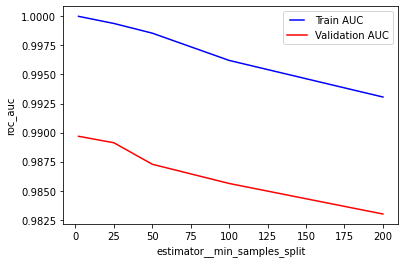

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
min_samples_split : 2 - Train Score : 1.0 , Validation Score : 0.9896852094993756
min_samples_split : 25 - Train Score : 0.999386481199171 , Validation Score : 0.98912691079007
min_samples_split : 50 - Train Score : 0.9985521244853519 , Validation Score : 0.9872784045059172
min_samples_split : 100 - Train Score : 0.9962083206446533 , Validation Score : 0.985626714035196
min_samples_split : 200 - Train Score : 0.9930629374184147 , Validation Score : 0.9830018878683076


In [29]:
pipeline = Pipeline([('smote', SMOTETomek(random_state=1, n_jobs=-1)),
                     ('estimator', RandomForestClassifier(random_state=1, n_estimators=400))])

space = [2, 25, 50, 100, 200]
train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'RandomForest/', X_train, y_train, 
                                                        hyperparameter_name='estimator__min_samples_split',
                                                        hyperparameter_space=space,
                                                        scoring='roc_auc', cv=5, verbose=False)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'min_samples_split : {x} - Train Score : {train_score} , Validation Score : {val_score}')

* A good space of min_samples_split would be 2-25.

Entered function tuning_single_hyperparameter.


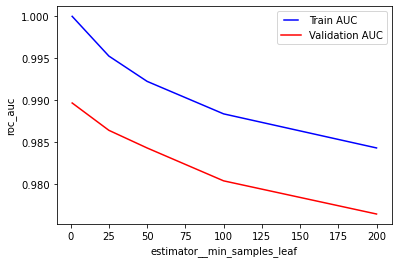

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
min_samples_leaf : 1 - Train Score : 1.0 , Validation Score : 0.9896852094993756
min_samples_leaf : 25 - Train Score : 0.995270427362499 , Validation Score : 0.9864314667261465
min_samples_leaf : 50 - Train Score : 0.9922581924228815 , Validation Score : 0.9843306372876439
min_samples_leaf : 100 - Train Score : 0.9883904137471206 , Validation Score : 0.9804171404964522
min_samples_leaf : 200 - Train Score : 0.9843337644217698 , Validation Score : 0.9764684937516271


In [30]:
pipeline = Pipeline([('smote', SMOTETomek(random_state=1, n_jobs=-1)),
                     ('estimator', RandomForestClassifier(random_state=1, n_estimators=400))])

space = [1, 25, 50, 100, 200]

train_scores, val_scores = tuning_single_hyperparameter(pipeline, 'RandomForest/', X_train, y_train, 
                                                        hyperparameter_name='estimator__min_samples_leaf',
                                                        hyperparameter_space=space,
                                                        scoring='roc_auc', cv=5, verbose=False)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'min_samples_leaf : {x} - Train Score : {train_score} , Validation Score : {val_score}')

* A good space of min_samples_leaf would be 1-25.

Entered function best_single_model_RandomizedSearchCV. 
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
Function train_model Completed Successfully! Exited this function.
Default RandomForestClassifier Model Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       492
           1       0.90      0.94      0.92       108

    accuracy                           0.97       600
   macro avg       0.95      0.96      0.95       600
weighted avg       0.97      0.97      0.97       600

Function evaluate_model_classification Completed Successfully. Exited this function
Default RandomForestClassifier Model Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0  

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.98865895 0.98614407 0.98968563 0.98732794 0.98869133 0.98823641
 0.98769674 0.9887202         nan        nan 0.98592663 0.9856525
 0.99250579 0.98005581 0.98918732 0.99271566 0.98345154 0.99054149
 0.99192509        nan        nan 0.98922895 0.98921608 0.98867415
 0.98885239 0.98729775 0.98865895 0.98808464 0.98846918 0.98784317]
  warnings.warn(


Function HyperparameterTuning_RandomizedSearchCV Completed Successfully! Exited this function.
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
Function train_model Completed Successfully! Exited this function.
Tuned Model RandomForestClassifier Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       492
           1       0.90      0.92      0.91       108

    accuracy                           0.97       600
   macro avg       0.94      0.95      0.94       600
weighted avg       0.97      0.97      0.97       600

Function evaluate_model_classification Completed Successfully. Exited this function
Tuned Model RandomForestClassifier Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              precision    recall 

{'Model Name': 'RandomForestClassifier',
 'Default Model Object': Pipeline(steps=[('smote', SMOTETomek(n_jobs=-1, random_state=1)),
                 ('estimator',
                  RandomForestClassifier(n_estimators=400, random_state=1))]),
 'Default Model Test Score': 0.9610433604336044,
 'Default Model Training Score': 1.0,
 'Default Model CV Mean Score': 0.9896852094993756,
 'Default Model CV Scores': array([0.99101346, 0.98925747, 0.98596683, 0.98985113, 0.99233716]),
 'Tuned Model Object': Pipeline(steps=[('smote',
                  SMOTETomek(n_jobs=-1, random_state=1, sampling_strategy=0.28)),
                 ('estimator',
                  RandomForestClassifier(criterion='entropy', max_depth=9,
                                         max_features=None, min_samples_leaf=20,
                                         min_samples_split=20, n_estimators=400,
                                         random_state=1))]),
 'Best Hyperparameters': {'smote__sampling_strategy': 0.28,
  

<Figure size 1080x864 with 0 Axes>

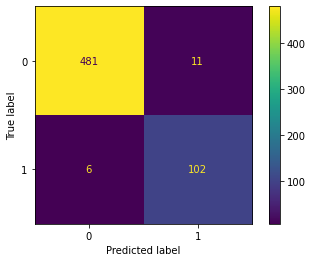

<Figure size 1080x864 with 0 Axes>

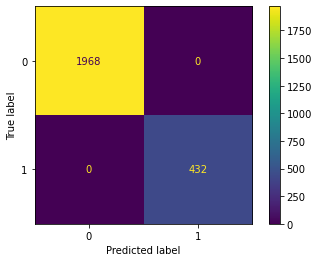

<Figure size 1080x864 with 0 Axes>

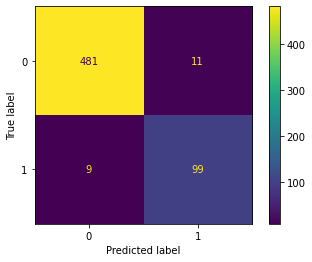

<Figure size 1080x864 with 0 Axes>

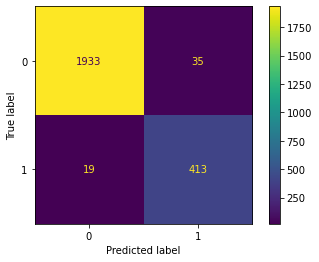

In [31]:
pipeline = Pipeline([('smote', SMOTETomek(random_state=1, n_jobs=-1)),
                     ('estimator', RandomForestClassifier(random_state=1, n_estimators=400))])

params = {'smote__sampling_strategy' : np.linspace(0.1, 1, 6),
             'estimator__max_depth' : [3, 6, 9, 12, 15],
             'estimator__max_features' : ['log2', 'sqrt', None],
             'estimator__min_samples_leaf' : [1, 10, 15, 20],
             'estimator__min_samples_split' : [2, 10, 15, 20],
             'estimator__criterion' : ['gini', 'entropy']}

dic = best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name='RandomForestClassifier',
                        defaultModel=pipeline, params=params, cv_scoring='roc_auc', cv_kfold=5, cv_n_iter=30)
dic

In [32]:
dic['Final Best Model Object']

Pipeline(steps=[('smote', SMOTETomek(n_jobs=-1, random_state=1)),
                ('estimator',
                 RandomForestClassifier(n_estimators=400, random_state=1))])

### 4. Tuning XGBoost with scale_pos_weight attribute

**Note:**<br>
* scale_pos_weight = nr of negative instances / nr of positive instances. (we can also tune this hyperaparameter)
* When tuning scale_pos_weight we must not use any resampling technique since the main aim of class_weight is to assign weights to unbalanced classes.

Entered function tuning_single_hyperparameter.


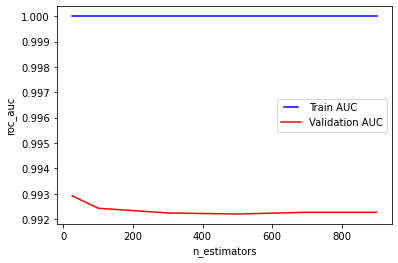

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Nr Estimators : 25 - Train Score : 1.0 , Validation Score : 0.9929188235375722
Nr Estimators : 100 - Train Score : 1.0 , Validation Score : 0.9924288274594115
Nr Estimators : 300 - Train Score : 1.0 , Validation Score : 0.9922431374899263
Nr Estimators : 500 - Train Score : 1.0 , Validation Score : 0.9922017140573793
Nr Estimators : 700 - Train Score : 1.0 , Validation Score : 0.9922696192013145
Nr Estimators : 900 - Train Score : 1.0 , Validation Score : 0.9922696721996092


In [33]:
from xgboost import XGBClassifier

s = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
estimator = XGBClassifier(random_state=1, scale_pos_weight=s)

space = [25, 100, 300, 500, 700, 900]
train_scores, val_scores = tuning_single_hyperparameter(estimator, 'XGBoost/', X_train, y_train,
                                                        'n_estimators', space, 'roc_auc',  5)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Nr Estimators : {x} - Train Score : {train_score} , Validation Score : {val_score}')

Entered function tuning_single_hyperparameter.


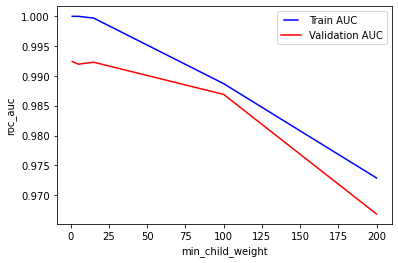

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Min Child Weight : 1 - Train Score : 1.0 , Validation Score : 0.9924288274594115
Min Child Weight : 5 - Train Score : 1.0 , Validation Score : 0.991969917125272
Min Child Weight : 15 - Train Score : 0.9997133058099674 , Validation Score : 0.9923010395941765
Min Child Weight : 100 - Train Score : 0.9887139162385872 , Validation Score : 0.9869102211236971
Min Child Weight : 200 - Train Score : 0.9728850617817926 , Validation Score : 0.9668388729723099


In [34]:
s = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
estimator = XGBClassifier(random_state=1, scale_pos_weight=s)

space = [1, 5, 15, 100, 200]
train_scores, val_scores = tuning_single_hyperparameter(estimator, 'XGBoost/', X_train, y_train,
                                                        'min_child_weight', space, 'roc_auc',  5)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Min Child Weight : {x} - Train Score : {train_score} , Validation Score : {val_score}')

Entered function best_single_model_RandomizedSearchCV. 
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
[00:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Function train_model Completed Successfully! Exited this function.

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Default XGBoostClassifier Model Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       492
           1       0.91      0.91      0.91       108

    accuracy                           0.97       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.97      0.97      0.97       600

Function evaluate_model_classification Completed Successfully. Exited this function
Default XGBoostClassifier Model Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1968
           1       1.00      1.00      1.00       432

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400

Function evaluate_model_classification Comp

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Function HyperparameterTuning_RandomizedSearchCV Completed Successfully! Exited this function.
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
[00:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Function train_model Completed Successfully! Exited this function.
Tuned Model XGBoostClassifier Performance on TEST

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Function evaluate_model_classification Completed Successfully. Exited this function
Tuned Model XGBoostClassifier Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1968
           1       0.92      0.99      0.95       432

    accuracy                           0.98      2400
   macro avg       0.96      0.99      0.97      2400
weighted avg       0.98      0.98      0.98      2400

Function evaluate_model_classification Completed Successfully. Exited this function
Function best_single_model_RandomizedSearchCV Completed Successfully. Exited this function.


{'Model Name': 'XGBoostClassifier',
 'Default Model Object': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=4.555555555555555,
               subsample=1, tree_method='exact', validate_parameters=1,
               verbosity=None),
 'Default Model Test Score': 0.9435411020776875,
 'Default Model Training Score': 1.0,
 'Default Model CV Mean Score': 0.9924288274594115,
 'Default Model CV Scores': array([0.99368433, 0.99356628, 0.9888738 , 0.99333158, 0.99268813]),
 'Tuned Model Object': XGBClassifier(base_score=0.5, booster='gbtree', colsample_b

<Figure size 1080x864 with 0 Axes>

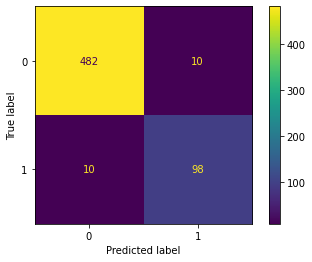

<Figure size 1080x864 with 0 Axes>

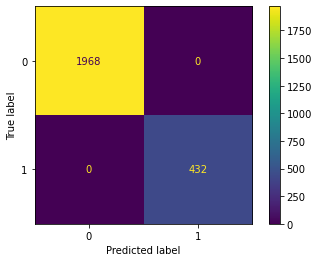

<Figure size 1080x864 with 0 Axes>

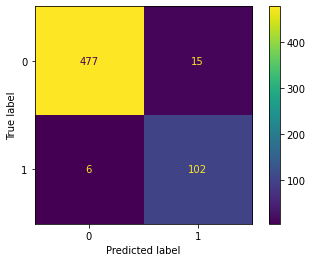

<Figure size 1080x864 with 0 Axes>

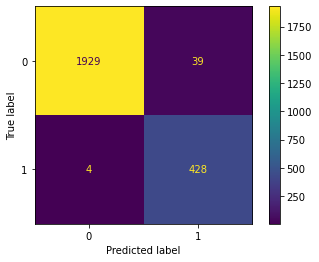

In [36]:
estimator = XGBClassifier(random_state=1, scale_pos_weight=s)

params = {'n_estimators' : [25, 50, 75, 100],
          'learning_rate' : np.linspace(0.01, 0.2, 6)[:-1][1:],
          'max_depth' : [2, 5, 7, 10],
          'subsample' : np.linspace(0, 1, 6)[:-1][1:],
          'colsample_bytree' : np.linspace(0, 1, 6)[:-1][1:],
          'min_child_weight' : [15, 20, 50, 100]}

dic = best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name='XGBoostClassifier',
                        defaultModel=estimator, params=params, cv_scoring='roc_auc', cv_kfold=5, cv_n_iter=30)
dic

### 5. Tuning Random Forest with class_weight attribute

**How it works:**<br>
RandomForest will assign weights to majority and minority class to the cost function (higher weight to minority and lower weight to majority), which means the error will be higher when we missclassify minority class and lower when we missclassify majority class. So we would end up choosing a model with lowest cost function which means model which has better predicted the minority class.

**Note :** <br>
* Class Weight attribute can be used with different ML Estimators like RandomForest, LogisticRegression, SupportVectorMachine etc. 
* When tuning class_weight we must not use any resampling technique since the main aim of class_weight is to assign weights to unbalanced classes.
* Since the weight of minority class must be higher than the weight of majority class (the sum must be 1) we can tune this hyperparameter for only these kind of values (for class 0 weights would range 0.5-0.45 and for class 1 weights would range 0.55-0.95

In [37]:
from sklearn.ensemble import RandomForestClassifier

Entered function tuning_single_hyperparameter.


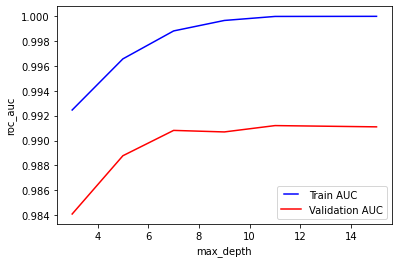

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Max Depth : 3 - Train Score : 0.9924600894292869 , Validation Score : 0.9840881188177985
Max Depth : 5 - Train Score : 0.9965762004725004 , Validation Score : 0.9887795981190074
Max Depth : 7 - Train Score : 0.9988252823190462 , Validation Score : 0.9908182227513214
Max Depth : 9 - Train Score : 0.999668076400315 , Validation Score : 0.9906946944298042
Max Depth : 11 - Train Score : 0.9999919149207394 , Validation Score : 0.9912056672157117
Max Depth : 15 - Train Score : 1.0 , Validation Score : 0.9911040862303176


In [38]:
estimator = RandomForestClassifier(random_state=1, n_estimators=400)

space = [3, 5, 7, 9, 11, 15]

train_scores, val_scores = tuning_single_hyperparameter(estimator, 'RandomForest/', X_train, y_train,
                                                        'max_depth', space, 'roc_auc',  5)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Max Depth : {x} - Train Score : {train_score} , Validation Score : {val_score}')

Entered function tuning_single_hyperparameter.


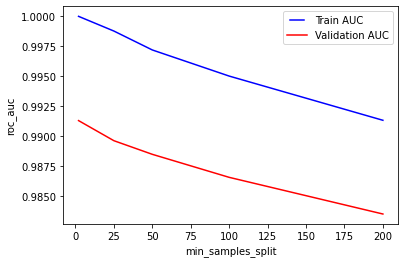

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
min_samples_split : 2 - Train Score : 1.0 , Validation Score : 0.9912862419731363
min_samples_split : 25 - Train Score : 0.9987700942557425 , Validation Score : 0.9896052578603367
min_samples_split : 50 - Train Score : 0.9971892033533717 , Validation Score : 0.9884663951158347
min_samples_split : 100 - Train Score : 0.995006335055766 , Validation Score : 0.9865423224130986
min_samples_split : 200 - Train Score : 0.9913118129790254 , Validation Score : 0.9834780423283466


In [39]:
estimator = RandomForestClassifier(random_state=1, n_estimators=400)

space = [2, 25, 50, 100, 200]

train_scores, val_scores = tuning_single_hyperparameter(estimator, 'RandomForest/', X_train, y_train,
                                                        'min_samples_split', space, 'roc_auc',  5)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'min_samples_split : {x} - Train Score : {train_score} , Validation Score : {val_score}')

In [40]:
* A good space of min_samples_split would be 

SyntaxError: invalid syntax (<ipython-input-40-9926073f8992>, line 1)

In [ ]:
estimator = RandomForestClassifier(random_state=1, n_estimators=400)

space = [1, 25, 50, 100, 200]

train_scores, val_scores = tuning_single_hyperparameter(estimator, 'RandomForest/', X_train, y_train,
                                                        'min_samples_leaf', space, 'roc_auc',  5)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'min_samples_leaf : {x} - Train Score : {train_score} , Validation Score : {val_score}')

In [ ]:
estimator = RandomForestClassifier(random_state=1, n_estimators=400)

# [:-1][1:] is used to not include 0.05 and 0.45
weights = np.linspace(0.05, 0.45, 5)[:-1][1:]

params = {'class_weight' : [{0:x, 1:1-x} for x in weights],
          'max_depth' : [3, 5, 7, 9, 11],
          'max_features' : ['sqrt', 'log2', None],
          'min_samples_split' : [2, 5, 7, 10],
          'min_samples_leaf' : [1, 3, 6, 10],
          'criterion' : ['gini', 'entropy']}

dic = best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name='RandomForestClassifier',
                        defaultModel=estimator, params=params, cv_scoring='roc_auc', cv_kfold=5, cv_n_iter=30)
dic

### 6. Ensemble Techniques   <br><br>A) Easy Ensemble Classifier

**How it works ?**<br>
Bag of balanced boosted learners also known as EasyEnsemble. The classifier is an ensemble of AdaBoost learners trained on different balanced boostrap samples. The balancing is achieved by random under-sampling.

Most important hyperparameters of EasyEnsembleClassifier are : <br>
1. sampling_strategy : 
2. nr_estimators : nr of base estimators used in bagging. <br>
   Note : No need to tune this hyperparameter. Usually a relative high nr works well always (not too large since it requires too much time for training and prediction) <br>
3. base_estimator : base Estimator used in bagging. <br>
   Note : Usually XGBoost and GradientBoosting  as base_estimator perform better than DecisionTree, AdaBoost, RandomForest so no need to tune this hyperparameter.

**Note :**<br>
Usually tuning these ensembling techniques does not improve model performance at all.

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
best_easyensemble = dic['Final Best Model Object']
best_easyensemble

### B) Balanced Bagging Classifier

In [42]:
from imblearn.ensemble import BalancedBaggingClassifier

**How it works ?** <br>
A Bagging classifier with additional balancing.

This implementation of Bagging is similar to the scikit-learn implementation. It includes an additional step to balance the training set at fit time using random under-sampling.

**Note :**<br>
Usually XGBoost and GradientBoosting  as base_estimator perform better than DecisionTree, AdaBoost, RandomForest

In [43]:
estimator = BalancedBaggingClassifier(random_state=1)
space = [AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), DecisionTreeClassifier(),
         RandomForestClassifier()]

train_scores, val_scores = tuning_single_hyperparameter(estimator, 'BalanedBaggingClassifier/', X_train, y_train,
                                                        'base_estimator', space, 'roc_auc',  5, graph=False)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Base Estimator : {x} - Train Score : {train_score} , Validation Score : {val_score}')

NameError: name 'AdaBoostClassifier' is not defined

Entered function tuning_single_hyperparameter.


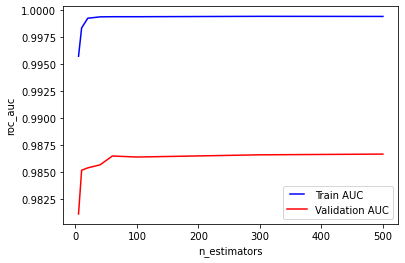

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
N Estimators : 5 - Train Score : 0.9957278273050726 , Validation Score : 0.9810674941361185
N Estimators : 10 - Train Score : 0.9983559544242544 , Validation Score : 0.985131945089444
N Estimators : 20 - Train Score : 0.9992578112174899 , Validation Score : 0.9853537124827186
N Estimators : 40 - Train Score : 0.9993839657600695 , Validation Score : 0.9856356010896187
N Estimators : 60 - Train Score : 0.9993994014399604 , Validation Score : 0.9864559443424131
N Estimators : 100 - Train Score : 0.99939866696133 , Validation Score : 0.9863620874700357
N Estimators : 300 - Train Score : 0.999433724195421 , Validation Score : 0.9865668992069561
N Estimators : 500 - Train Score : 0.9994241797110078 , Validation Score : 0.9866340358756194


In [44]:
estimator = BalancedBaggingClassifier(random_state=1)
space = [5, 10, 20, 40, 60, 100, 300, 500]

train_scores, val_scores = tuning_single_hyperparameter(estimator, 'BalanedBaggingClassifier/', X_train, y_train,
                                                        'n_estimators', space, 'roc_auc',  5, graph=True)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'N Estimators : {x} - Train Score : {train_score} , Validation Score : {val_score}')

Entered function tuning_single_hyperparameter.


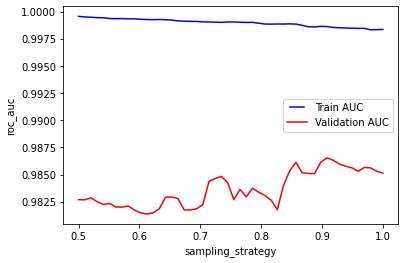

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Sampling Strategy : 0.5 - Train Score : 0.9995615874346957 , Validation Score : 0.9826900295026487
Sampling Strategy : 0.5102040816326531 - Train Score : 0.99950657385425 , Validation Score : 0.9826670820179269
Sampling Strategy : 0.5204081632653061 - Train Score : 0.9994764137157915 , Validation Score : 0.9828571640268665
Sampling Strategy : 0.5306122448979592 - Train Score : 0.9994394853991638 , Validation Score : 0.9824972877389039
Sampling Strategy : 0.5408163265306123 - Train Score : 0.9994280739853046 , Validation Score : 0.982237091316728
Sampling Strategy : 0.5510204081632653 - Train Score : 0.9993615193615198 , Validation Score : 0.9823398019253821
Sampling Strategy : 0.5612244897959183 - Train Score : 0.9993472153018267 , Validation Score : 0.9820090141053182
Sampling Strategy : 0.5714285714285714 - Train Score : 0.9993508955858506 , Validation Score : 0.9819985704202029
Sampling Strategy : 0.

In [45]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

estimator = BalancedBaggingClassifier(random_state=1)
space = np.linspace(0.5, 1)

train_scores, val_scores = tuning_single_hyperparameter(estimator, 'BalanedBaggingClassifier/', X_train, y_train,
                                                        'sampling_strategy', space, 'roc_auc',  5, graph=True)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Sampling Strategy : {x} - Train Score : {train_score} , Validation Score : {val_score}')

Entered function best_single_model_RandomizedSearchCV. 
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
Function train_model Completed Successfully! Exited this function.
Default BalancedBaggingClassifier Model Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       492
           1       0.88      0.94      0.91       108

    accuracy                           0.97       600
   macro avg       0.93      0.96      0.95       600
weighted avg       0.97      0.97      0.97       600

Function evaluate_model_classification Completed Successfully. Exited this function
Default BalancedBaggingClassifier Model Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

        

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=30. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.99208871 0.99034995        nan]
  warnings.warn(


Function HyperparameterTuning_RandomizedSearchCV Completed Successfully! Exited this function.
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
Function train_model Completed Successfully! Exited this function.
Tuned Model BalancedBaggingClassifier Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       492
           1       0.88      0.94      0.91       108

    accuracy                           0.96       600
   macro avg       0.93      0.95      0.94       600
weighted avg       0.97      0.96      0.97       600

Function evaluate_model_classification Completed Successfully. Exited this function
Tuned Model BalancedBaggingClassifier Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              precision    r

{'Model Name': 'BalancedBaggingClassifier',
 'Default Model Object': BalancedBaggingClassifier(base_estimator=XGBClassifier(base_score=None,
                                                        booster=None,
                                                        colsample_bylevel=None,
                                                        colsample_bynode=None,
                                                        colsample_bytree=None,
                                                        gamma=None, gpu_id=None,
                                                        importance_type='gain',
                                                        interaction_constraints=None,
                                                        learning_rate=None,
                                                        max_delta_step=None,
                                                        max_depth=None,
                                                        min_child_weight=None,


<Figure size 1080x864 with 0 Axes>

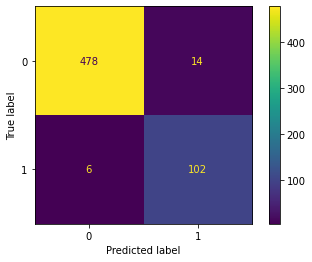

<Figure size 1080x864 with 0 Axes>

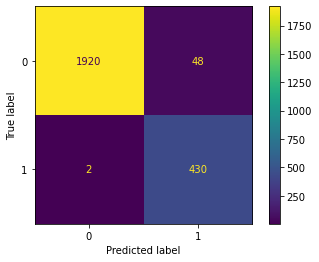

<Figure size 1080x864 with 0 Axes>

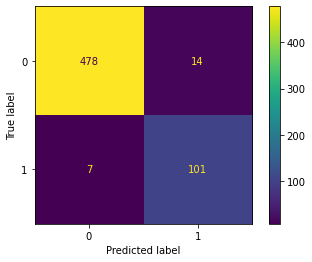

<Figure size 1080x864 with 0 Axes>

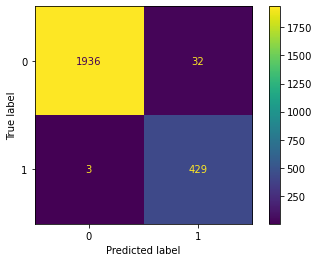

In [46]:
estimator = BalancedBaggingClassifier(random_state=1, base_estimator=XGBClassifier(random_state=1),
                                   n_jobs=-1)

params = {'sampling_strategy' : [0.5, 1, 6]}

dic = best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name='BalancedBaggingClassifier',
                        defaultModel=estimator, params=params, cv_scoring='roc_auc', cv_kfold=5, cv_n_iter=30)
dic

### C) Balanced RandomForest Classifier

**How it works ?**<br>
A balanced random forest classifier.A balanced random forest randomly under-samples each boostrap sample to balance it.

In [47]:
from imblearn.ensemble import BalancedRandomForestClassifier

Entered function tuning_single_hyperparameter.


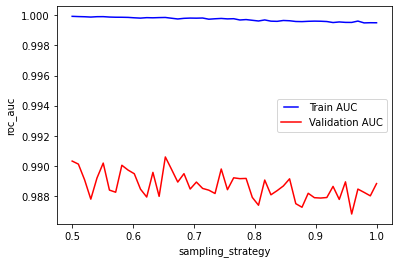

Function tuning_single_hyperparameter Completed Successfully. Exited this function.
Sampling Strategy : 0.5 - Train Score : 0.9999336726033239 , Validation Score : 0.9903272128865639
Sampling Strategy : 0.5102040816326531 - Train Score : 0.9999180175871963 , Validation Score : 0.9901254750507317
Sampling Strategy : 0.5204081632653061 - Train Score : 0.9999066298459536 , Validation Score : 0.989083384084811
Sampling Strategy : 0.5306122448979592 - Train Score : 0.9998850994160925 , Validation Score : 0.9877998641351601
Sampling Strategy : 0.5408163265306123 - Train Score : 0.9999101360624282 , Validation Score : 0.9892079723722205
Sampling Strategy : 0.5510204081632653 - Train Score : 0.9999132484598079 , Validation Score : 0.9901934066938145
Sampling Strategy : 0.5612244897959183 - Train Score : 0.9998862430802529 , Validation Score : 0.9884009672537486
Sampling Strategy : 0.5714285714285714 - Train Score : 0.9998746654897166 , Validation Score : 0.9882597019394554
Sampling Strategy : 

In [48]:
estimator = BalancedRandomForestClassifier(random_state=1)
space = np.linspace(0.5, 1)

train_scores, val_scores = tuning_single_hyperparameter(estimator, 'BalanedRandomForestClassifier/', X_train, y_train,
                                                        'sampling_strategy', space, 'roc_auc',  5, graph=True)

for x, train_score, val_score in zip(space, train_scores, val_scores):
    print(f'Sampling Strategy : {x} - Train Score : {train_score} , Validation Score : {val_score}')

Entered function best_single_model_RandomizedSearchCV. 
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
Function train_model Completed Successfully! Exited this function.
Default BalancedRandomForestClassifier Model Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       492
           1       0.85      0.94      0.89       108

    accuracy                           0.96       600
   macro avg       0.92      0.95      0.94       600
weighted avg       0.96      0.96      0.96       600

Function evaluate_model_classification Completed Successfully. Exited this function
Default BalancedRandomForestClassifier Model Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=30. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.99032721 0.98883286        nan]
  warnings.warn(


Function HyperparameterTuning_RandomizedSearchCV Completed Successfully! Exited this function.
Entered function evaluate_model_cross_validation.
Function evaluate_model_cross_validation Completed Successfully.Exited this function.
Entered the function train_model
Function train_model Completed Successfully! Exited this function.
Tuned Model BalancedRandomForestClassifier Performance on TEST SET : 
Entered function evaluate_model_classification.
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       492
           1       0.89      0.94      0.91       108

    accuracy                           0.97       600
   macro avg       0.94      0.96      0.95       600
weighted avg       0.97      0.97      0.97       600

Function evaluate_model_classification Completed Successfully. Exited this function
Tuned Model BalancedRandomForestClassifier Performance on TRAINING SET : 
Entered function evaluate_model_classification.
              prec

{'Model Name': 'BalancedRandomForestClassifier',
 'Default Model Object': BalancedRandomForestClassifier(n_jobs=-1, random_state=1),
 'Default Model Test Score': 0.9539295392953928,
 'Default Model Training Score': 0.9857723577235773,
 'Default Model CV Mean Score': 0.9888328628724782,
 'Default Model CV Scores': array([0.991707  , 0.98983296, 0.98400425, 0.98647305, 0.99214706]),
 'Tuned Model Object': BalancedRandomForestClassifier(n_jobs=-1, random_state=1, sampling_strategy=0.5),
 'Best Hyperparameters': {'sampling_strategy': 0.5},
 'Tuned Model CV Mean Score': 0.9903272128865639,
 'Tuned Model CV Scores': array([0.99091016, 0.98930174, 0.9868522 , 0.99052382, 0.99404814]),
 'Tuned Model Test Score': 0.955397470641373,
 'Tuned Model Training Score': 0.9928861788617885,
 'Final Best Model Name': 'Tuned Model',
 'Final Best Test Score': 0.955397470641373,
 'Final Best Model Object': BalancedRandomForestClassifier(n_jobs=-1, random_state=1, sampling_strategy=0.5)}

<Figure size 1080x864 with 0 Axes>

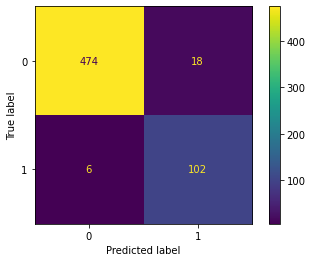

<Figure size 1080x864 with 0 Axes>

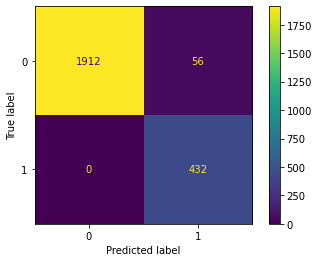

<Figure size 1080x864 with 0 Axes>

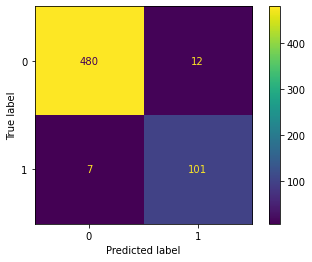

<Figure size 1080x864 with 0 Axes>

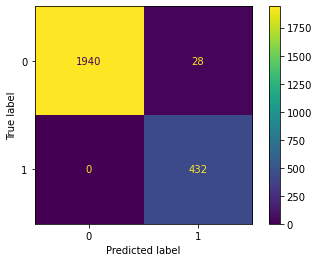

In [50]:
estimator = BalancedRandomForestClassifier(random_state=1,
                                   n_jobs=-1)

params = {'sampling_strategy' : [0.5, 1, 6]}

dic = best_single_model_RandomizedSearchCV(X_train, y_train, X_test, y_test, model_name='BalancedRandomForestClassifier',
                        defaultModel=estimator, params=params, cv_scoring='roc_auc', cv_kfold=5, cv_n_iter=30)
dic

### D) RUSBoostClassifier